<a href="https://www.kaggle.com/code/arshnoorsinghthind/python-final-project?scriptVersionId=233386452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/matches/matches.csv


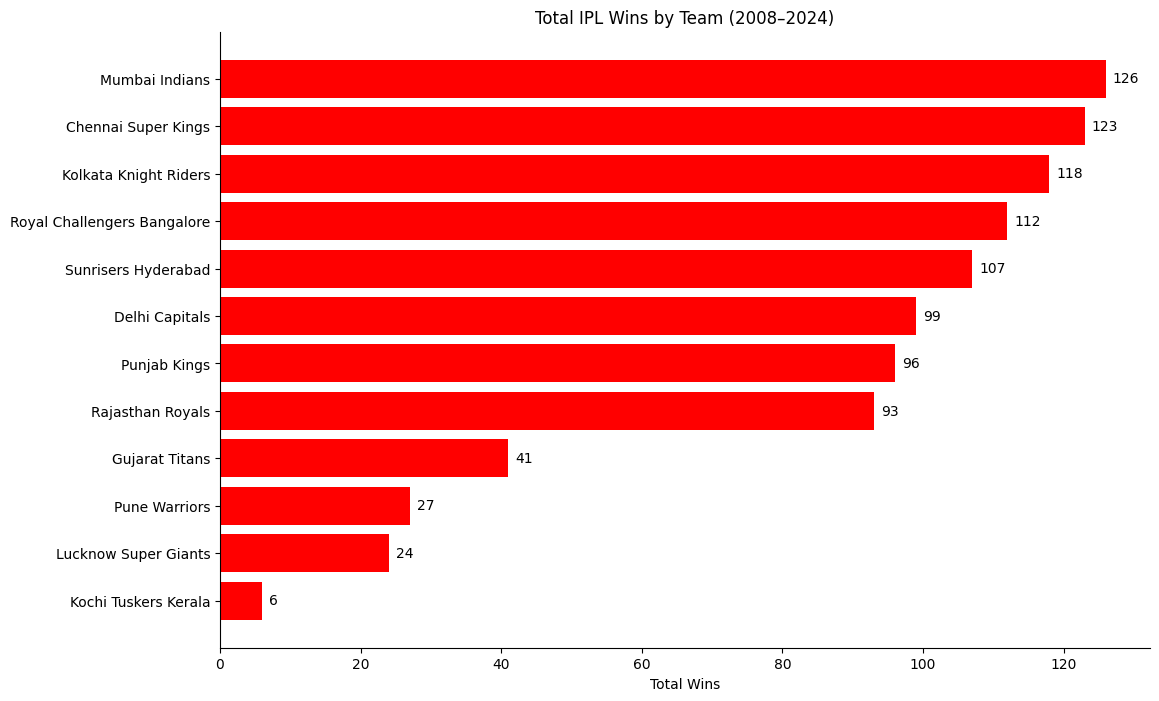

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # for plotting

# --------------------------
# Load in IPL Matches Dataset
# --------------------------
df_mat = pd.read_csv('/kaggle/input/matches/matches.csv')

# --------------------------
# Clean and Format Season Info
# --------------------------
def extract_year(season_str):
    if isinstance(season_str, str) and '-' in season_str:
        return int('20' + season_str.split('-')[-1])
    try:
        return int(season_str)
    except:
        return np.nan

df_mat['season'] = df_mat['season'].apply(extract_year)

# --------------------------
# Standardize Team Names
# --------------------------
team_map = {
    "Mumbai Indians": "Mumbai Indians",
    "Chennai Super Kings": "Chennai Super Kings",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
    "Royal Challengers Bengaluru": "Royal Challengers Bangalore",
    "Rajasthan Royals": "Rajasthan Royals",
    "Kings XI Punjab": "Punjab Kings",
    "Punjab Kings": "Punjab Kings",
    "Sunrisers Hyderabad": "Sunrisers Hyderabad",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Capitals": "Delhi Capitals",
    "Delhi Daredevils": "Delhi Capitals",
    "Gujarat Titans": "Gujarat Titans",
    "Gujarat Lions": "Gujarat Titans",
    "Lucknow Super Giants": "Lucknow Super Giants",
    "Pune Warriors": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",
    "Rising Pune Supergiants": "Pune Warriors",
    "Kochi Tuskers Kerala": "Kochi Tuskers Kerala"
}
df_mat['winner'] = df_mat['winner'].map(team_map)

# --------------------------
# Filter Seasons from 2008 to 2024
# --------------------------
df_mat = df_mat[df_mat['season'].notna()]
df_filtered = df_mat[df_mat['season'].between(2008, 2024)]

# --------------------------
# Count Total Wins per Team
# --------------------------
win_counts = df_filtered['winner'].value_counts().sort_values(ascending=False)

# --------------------------
# Create the Figure and Axis
# --------------------------
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# --------------------------
# Bar Plot of Team Wins
# --------------------------
ax.barh(win_counts.index, win_counts.values, color='red')
ax.invert_yaxis()
ax.set_xlabel("Total Wins")
ax.set_title("Total IPL Wins by Team (2008–2024)")
ax.spines[['top', 'right']].set_visible(False)

# --------------------------
# Annotate Bars with Win Counts
# --------------------------
for i, v in enumerate(win_counts.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

# --------------------------
# Save and Show Figure
# --------------------------
fig.savefig("IPL_Win_Graph.png", dpi=300, bbox_inches="tight")
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load in IPL Matches Dataset
# --------------------------
df_mat = pd.read_csv('/kaggle/input/matches/matches.csv')

# --------------------------
# Clean and Format Season Info
# --------------------------
def extract_year(season_str):
    if isinstance(season_str, str) and '-' in season_str:
        return int('20' + season_str.split('-')[-1])
    try:
        return int(season_str)
    except:
        return np.nan

df_mat['season'] = df_mat['season'].apply(extract_year)

# --------------------------
# Standardize Team Names
# --------------------------
team_map = {
    "Mumbai Indians": "Mumbai Indians",
    "Chennai Super Kings": "Chennai Super Kings",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
    "Royal Challengers Bengaluru": "Royal Challengers Bangalore",
    "Rajasthan Royals": "Rajasthan Royals",
    "Kings XI Punjab": "Punjab Kings",
    "Punjab Kings": "Punjab Kings",
    "Sunrisers Hyderabad": "Sunrisers Hyderabad",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Capitals": "Delhi Capitals",
    "Delhi Daredevils": "Delhi Capitals",
    "Gujarat Titans": "Gujarat Titans",
    "Gujarat Lions": "Gujarat Titans",
    "Lucknow Super Giants": "Lucknow Super Giants",
    "Pune Warriors": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",
    "Rising Pune Supergiants": "Pune Warriors",
    "Kochi Tuskers Kerala": "Kochi Tuskers Kerala"
}
df_mat['winner'] = df_mat['winner'].map(team_map)

# --------------------------
# Filter Seasons from 2008 to 2024
# --------------------------
df_mat = df_mat[df_mat['season'].notna()]
df_filtered = df_mat[df_mat['season'].between(2008, 2024)]

# --------------------------
# Table: Wins per Team per Season
# --------------------------
season_wins = df_filtered.groupby(['season', 'winner']).size().reset_index(name='wins')
pivot_table = season_wins.pivot(index='season', columns='winner', values='wins').fillna(0).astype(int)
display(pivot_table)

winner,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,
2009.0,17,17,0,0,10,0,16,0,11,12,17,17
2011.0,11,4,0,6,8,0,10,4,7,6,10,6
2012.0,10,11,0,0,12,0,10,4,8,7,8,4
2013.0,12,3,0,0,6,0,13,4,8,11,9,10
2014.0,10,2,0,0,11,0,7,0,12,7,5,6
2015.0,10,5,0,0,7,0,10,0,3,7,8,7
2016.0,0,7,9,0,8,0,7,5,4,0,9,11
2017.0,0,6,4,0,9,0,12,10,7,0,3,8
2018.0,11,5,0,0,9,0,6,0,6,7,6,10


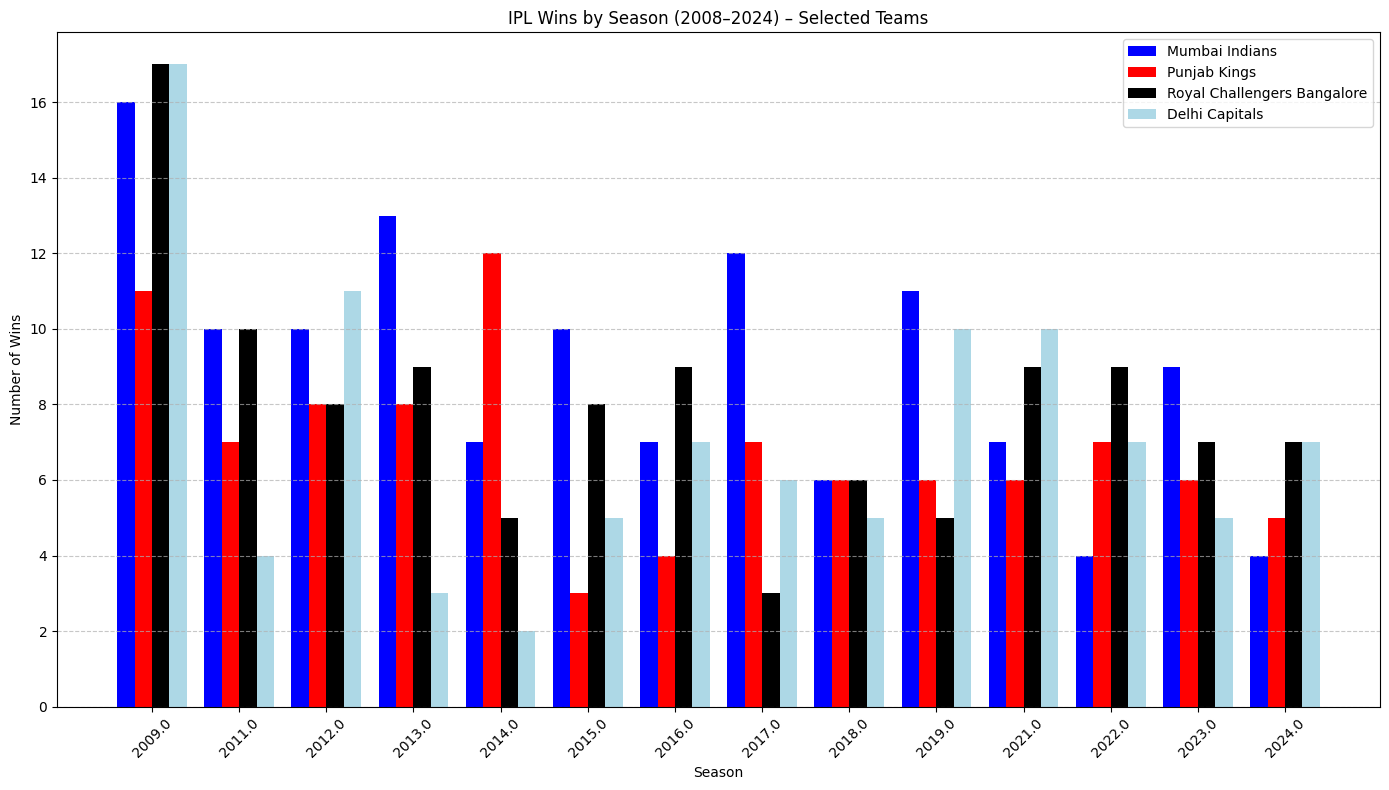

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load in IPL Matches Dataset
# --------------------------
df_mat = pd.read_csv('/kaggle/input/matches/matches.csv')

# --------------------------
# Clean and Format Season Info
# --------------------------
def extract_year(season_str):
    if isinstance(season_str, str) and '-' in season_str:
        return int('20' + season_str.split('-')[-1])
    try:
        return int(season_str)
    except:
        return np.nan

df_mat['season'] = df_mat['season'].apply(extract_year)

# --------------------------
# Standardize Team Names
# --------------------------
team_map = {
    "Mumbai Indians": "Mumbai Indians",
    "Chennai Super Kings": "Chennai Super Kings",
    "Kolkata Knight Riders": "Kolkata Knight Riders",
    "Royal Challengers Bangalore": "Royal Challengers Bangalore",
    "Royal Challengers Bengaluru": "Royal Challengers Bangalore",
    "Rajasthan Royals": "Rajasthan Royals",
    "Kings XI Punjab": "Punjab Kings",
    "Punjab Kings": "Punjab Kings",
    "Sunrisers Hyderabad": "Sunrisers Hyderabad",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Capitals": "Delhi Capitals",
    "Delhi Daredevils": "Delhi Capitals",
    "Gujarat Titans": "Gujarat Titans",
    "Gujarat Lions": "Gujarat Titans",
    "Lucknow Super Giants": "Lucknow Super Giants",
    "Pune Warriors": "Pune Warriors",
    "Rising Pune Supergiant": "Pune Warriors",
    "Rising Pune Supergiants": "Pune Warriors",
    "Kochi Tuskers Kerala": "Kochi Tuskers Kerala"
}
df_mat['winner'] = df_mat['winner'].map(team_map)

# --------------------------
# Filter Seasons from 2008 to 2024
# --------------------------
df_mat = df_mat[df_mat['season'].notna()]
df_mat = df_mat[df_mat['season'].between(2008, 2024, inclusive='both')]

# --------------------------
# Grouped Bar Chart for Selected Teams
# --------------------------
selected_teams = [
    "Mumbai Indians",
    "Punjab Kings",
    "Royal Challengers Bangalore",
    "Delhi Capitals"
]

filtered_pivot = pivot_table[selected_teams]

# --------------------------
# Add in Team Colours 
# --------------------------
team_colors = {
    "Mumbai Indians": "blue",          # MI Blue
    "Punjab Kings": "red",            # PBKS Red
    "Royal Challengers Bangalore": "black",  # RCB Black
    "Delhi Capitals": "lightblue"           # DC Light Blue
}

fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
seasons = filtered_pivot.index
x = np.arange(len(seasons))

for i, team in enumerate(selected_teams):
    wins = filtered_pivot[team].values
    ax.bar(x + i * bar_width, wins, width=bar_width, label=team, color=team_colors[team])

ax.set_title("IPL Wins by Season (2008–2024) – Selected Teams")
ax.set_xlabel("Season")
ax.set_ylabel("Number of Wins")
ax.set_xticks(x + bar_width * (len(selected_teams) - 1) / 2)
ax.set_xticklabels(seasons, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

# --------------------------
# Save and Show Figure
# --------------------------
fig.savefig("IPL_Win_Graph_Select.png", dpi=300, bbox_inches="tight")
plt.show()